In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Getting our data ready

Three main things we have to do:
1. Split the data into features and labels (usually 'x' and 'y') 
2. Filling(also called inputting) or disregarding missing values 
3. Converting non-numerical values to numerical values (also called feature encoding)
    

In [2]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = heart_disease.drop("target", axis=1) # remove the label which we used for output
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [7]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [8]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
#Split the data
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [10]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [11]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor  #This is not classification problem but predicting number

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
#Turn the categoried into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough") #passthrough means dont do anything on other columns except catrgorical features
transformed_x = transformer.fit_transform(x)
transformed_x
#It does one hot enconding which is mentioned in the notebook


In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies #Doors is number so it didn't apply encoding in it
#just like one hot encoding which we did above

In [ ]:
#Let's refit the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train);

In [ ]:
model.score(x_test, y_test)

## 1.2 What if there were missing values?
1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data altogether

In [ ]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv");
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#create x and y
x = car_sales_missing.drop("Price")
y=car_sales_missing["Price"]

#### Option1 fill missing data with Pandas


In [ ]:
#Fill the make column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
x = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]


In [ ]:
#Let's try and convert our data to numbers
#Turn the categoried into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough") #passthrough means dont do anything on other columns except catrgorical features
transformed_x = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_x)
#It does one hot enconding which is mentioned in the notebook



In [ ]:
### Option2 : fill missing with sklearn 
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
#Drop rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing

In [ ]:
#Split into x and y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
#imputer help us in filling missing values

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(x_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(x_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

# Fill categorical values with 'missing' & numerical values with mean

In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test

In [ ]:
car_sales_filled_test.isna().sum()

In [ ]:
#Let's try and convert our data to numbers
#Turn the categoried into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough") #passthrough means dont do anything on other columns except catrgorical features
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.fit_transform(car_sales_filled_test)

#It does one hot enconding which is mentioned in the notebook

transformed_x_train.toarray()

In [ ]:
##Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor(n_estimators=20)

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

1. Classification - predicting whether a sample is one thing or another
2. Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [ ]:
#import Boston Housing datasets

from sklearn.datasets import load_boston
boston = load_boston()
boston


In [ ]:
#boston is a dictionary
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()
#search boston housing dataset in sklearn

In [ ]:
len(boston_df)

Reference to the map http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
#Lets try the Ridge regression model (We are following sklearn map which snap is saved in images folder)
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split the data
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

model.score(x_test, y_test)

In [ ]:
#How do we increase the score?
#What if Ridge Regression not working?
#Ans: We should go for Ensemble method which is Random Forest method

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split the data
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

#Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test, y_test)


In [ ]:
x_train

In [ ]:
pr = np.array([0.06,2.18,0.0,8.56,0.1,0.32,5.836,24.1,2.71,22.0,664.0,20.1,102.3])
pr2 = pr.reshape(1,-1)
model.predict(pr.reshape(1,-1))

In [ ]:
model.predict_proba(x_test[:5]) 

### 2.2 Choosing the estimator for Classification problem 

In [ ]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

Consulting the map and it says try LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train, y_train)

#Evaluate SVC
clf.score(x_test, y_test)


In [ ]:
check = np.array([12,1,0,130,200,0,0,174,1,0.8,0,0,1])
clf.predict(check.reshape(1,-1))

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#Now we used RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Evaluate SVC
clf.score(x_test, y_test)


Tidbit: 
1. If you have structured data, used ensemble method
2. If you have unstructured data(images or voice data), used deep learning or transfer learning model

In [ ]:
heart_disease.head()

In [ ]:
check = np.array([12,1,0,130,200,0,0,174,1,0.8,0,0,1])
clf.predict(check.reshape(1,-1))

## 3. Fit the model/algo on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `x` = features, features variables,data
* `y` = labels, targets, target variables

In [ ]:
#Now we used RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate LinearSVC
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(x_train, y_train)

#Evaluate SVC (use th pattern the model has learn)
clf.score(x_test, y_test) 


### 3.2 make predictions with predict_proba()

In [ ]:
#predict_proba() returns probabilities of a classification

clf.predict_proba(x_test[:5])


In [ ]:
#Let's predict on the same data
clf.predict(x_test[:5])

`predict()` can also be used for regression models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

#make predictions
y_preds = model.predict(x_test)
y_preds[:10] #predictions

In [ ]:
np.array(y_test[:10]) #actual labels

In [ ]:
#Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


In [ ]:
#The above results tells us that on avg every predictions has an error of +- 2 
#The predicted result has value which is above or below 2 from it's range

## 4. Evaluating a machine learning model

* Sklearn has 3 different metric function to evaluate the model

    1. Estimator `scoring` method
    2. The `scoring` parameter
    3. Problem-specific metric functions
    
 ### Evaluating a model with `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)


In [ ]:
clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test) #return the mean accuracy for classification problem

Let's do the same but for regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

# #make predictions
# y_preds = model.predict(x_test)
# y_preds[:10] #predictions

In [ ]:
model.score(x_test, y_test) #both models have different method to score the predictions
#return coefficient of determination for regression problem

### 4.2 Evaluating a model using scoring parameter

In [12]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train);




In [13]:
clf.score(x_test,y_test)

0.7892561983471075

In [18]:
np.random.seed(42)
#cross validation testing
cross_val_score(clf, x,y) #Take the whole x and y data
#we can also define cv=1,2,3,4.. as a parameter to above func
#returns an array

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [16]:
np.random.seed(42)

#Single training and testing split score
clf_single_score = clf.score(x_test,y_test)

#Take the mean of 5 cross val score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y))

#Compare the two
clf_single_score, clf_cross_val_score

(0.7892561983471075, 0.8248087431693989)

In [19]:
#Scoring parameter set to none by default
cross_val_score(clf,x,y,scoring=None) #scoring parameter can be changed

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] 

clf = RandomForestClassifier()
cross_score = cross_val_score(clf,x,y)




In [21]:
np.mean(cross_score)

0.8248087431693989

In [24]:
print(f"Heart Disease Classifier cross-validated Accuracy: {np.mean(cross_score) * 100:.2f}%")

Heart Disease Classifier cross-validated Accuracy: 82.48%


#### Area under ROC curve (Receiver operating characteristics) AUC/ROC
* Area under curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's tru positive rate(tpr) versus a model's false positive rate(fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)
#len(x_test)

(array([[0.09, 0.91],
        [0.82, 0.18],
        [0.14, 0.86],
        [0.22, 0.78],
        [0.86, 0.14],
        [0.27, 0.73],
        [0.21, 0.79],
        [0.34, 0.66],
        [0.1 , 0.9 ],
        [0.01, 0.99]]),
 242)

In [30]:
y_probs_positive = y_probs[:,1] #all rows and having 1st index
y_probs_positive[:10]

array([0.91, 0.18, 0.86, 0.78, 0.14, 0.73, 0.79, 0.66, 0.9 , 0.99])

In [32]:
#Calculate fpr, tpr and threshold

fpr, tpr, threshold = roc_curve(y_test,y_probs_positive) #check docstring

#Check fpr
fpr, len(fpr)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00917431, 0.00917431, 0.00917431, 0.00917431,
        0.02752294, 0.02752294, 0.04587156, 0.04587156, 0.05504587,
        0.05504587, 0.06422018, 0.0733945 , 0.09174312, 0.09174312,
        0.10091743, 0.10091743, 0.11009174, 0.11009174, 0.12844037,
        0.14678899, 0.14678899, 0.1559633 , 0.1559633 , 0.17431193,
        0.21100917, 0.21100917, 0.2293578 , 0.23853211, 0.23853211,
        0.25688073, 0.26605505, 0.28440367, 0.29357798, 0.31192661,
        0.32110092, 0.33027523, 0.34862385, 0.37614679, 0.39449541,
        0.41284404, 0.42201835, 0.43119266, 0.44954128, 0.46788991,
        0.47706422, 0.48623853, 0.48623853, 0.50458716, 0.53211009,
        0.55963303, 0.56880734, 0.6146789 , 0.63302752, 0.66972477,
        0.72477064, 0.75229358, 0.7706422 , 0.80733945, 0.81651376,
        0.87155963, 0.90825688, 0.91743119, 0.94495413, 0.98165138,
        1.        ]),
 71)

In [34]:
tpr,len(tpr)

(array([0.        , 0.03007519, 0.06766917, 0.09022556, 0.14285714,
        0.18045113, 0.20300752, 0.27819549, 0.30075188, 0.36090226,
        0.38345865, 0.40601504, 0.43609023, 0.45864662, 0.47368421,
        0.4962406 , 0.5112782 , 0.5112782 , 0.56390977, 0.59398496,
        0.61654135, 0.64661654, 0.66165414, 0.66917293, 0.69172932,
        0.70676692, 0.72932331, 0.72932331, 0.7443609 , 0.77443609,
        0.78195489, 0.79699248, 0.81203008, 0.81203008, 0.83458647,
        0.84962406, 0.84962406, 0.88721805, 0.90225564, 0.90225564,
        0.90977444, 0.90977444, 0.91729323, 0.92481203, 0.93233083,
        0.93233083, 0.94736842, 0.94736842, 0.94736842, 0.95488722,
        0.96240602, 0.96240602, 0.96992481, 0.98496241, 0.98496241,
        0.98496241, 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
        0.9924812 , 0.9924812 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 71)

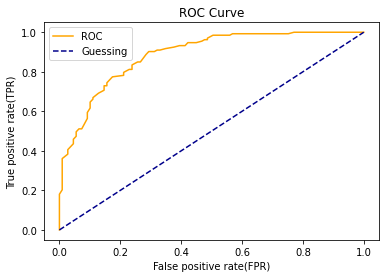

In [33]:
#Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_curve(fpr, tpr):
    """
    Plots a ROC given the fpr and tpr of a modal
    """
    #plot roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    #plot line with no predictive power
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_curve(fpr,tpr)

In [35]:
from sklearn.metrics import roc_auc_score #Area under the curve

roc_auc_score(y_test, y_probs_positive)

0.8856315099675796

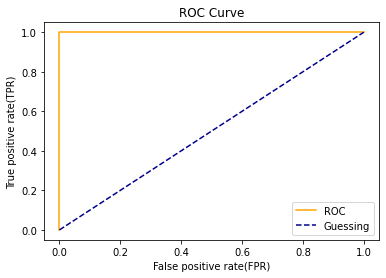

In [36]:
#plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test) #means its an ideal curve which area is 100%
plot_curve(fpr,tpr)

#### Confusion Matrix

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [37]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[ 66,  43],
       [  9, 124]], dtype=int64)

In [38]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual Label,,
0,66,43
1,9,124


In [39]:
66 + 43 + 9 + 124

242

In [40]:
len(y_preds)

242

In [46]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual Label,,
0,66,43
1,9,124


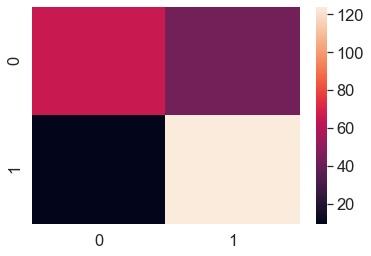

In [45]:
#make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat);